In [1]:
from urllib.request import urlopen
from rdflib import Graph, plugin
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
json_data = urlopen("http://sfsheath.github.io/roman-amphitheaters/roman-amphitheaters.geojson")
g = Graph().parse(data=json_data.read(), format='json-ld')

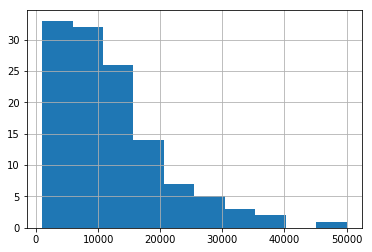

In [10]:
results = g.query("""
PREFIX ramphs: <http://purl.org/roman-amphitheaters/resource/>
PREFIX gj: <https://purl.org/geojson/vocab#>
PREFIX ramphs-p: <http://purl.org/roman-amphitheaters/properties#>
PREFIX dcterms: <http://purl.org/dc/terms/>
SELECT ?title ?capacity WHERE {

?s gj:properties/ramphs-p:capacity/ramphs-p:quantity ?capacity .
?s gj:properties/dcterms:title ?title
}""")

caps = []
for row in results:
    caps.append(float(row.capacity))
ramphs_pd = pd.Series({'capacity':caps})
ramphs_pd.hist()